In [110]:
#!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Import Dataset
orginal_df = pd.read_csv('../data/raw/01_swiggy.csv')

#copy to working df
df= orginal_df.copy()

In [114]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [115]:
#shape
df.shape

(45593, 20)

In [116]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

- No null values
- Dtype of some columns to be corrected (Delivery_person_Age, Delivery_person_Ratings, Order_Date,Time_Orderd, Time_Order_picked, Weatherconditions,Road_traffic_density)

In [117]:
#checking for missing value
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

- No missing values

In [118]:
df.sample(20)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
23164,0xd5e8,DEHRES14DEL03,21,4.9,30.319528,78.040267,30.409528,78.130267,18-02-2022,22:35:00,22:40:00,conditions Windy,Low,2,Snack,scooter,0,No,Metropolitian,(min) 16
1601,0x34ce,COIMBRES15DEL01,31,4.6,11.006686,76.951736,11.046686,76.991736,28-03-2022,12:15:00,12:30:00,conditions Sunny,High,2,Drinks,scooter,1,No,NaN,(min) 21
9345,0x3049,SURRES16DEL02,28,4.7,21.160437,72.774209,21.210437,72.824209,07-03-2022,23:45:00,00:00:00,conditions Sunny,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 18
4469,0xbc91,COIMBRES20DEL02,32,4.7,10.994136,76.963303,11.014136,76.983303,21-03-2022,09:00:00,09:15:00,conditions Sunny,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 25
10390,0x2da7,SURRES16DEL01,24,4.5,21.160437,72.774209,21.200437,72.814209,07-03-2022,12:25:00,12:30:00,conditions Windy,High,1,Meal,scooter,0,No,Urban,(min) 24
22800,0x83fc,CHENRES11DEL03,27,5,13.064181,80.236442,13.124181,80.296442,09-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,scooter,1,NaN,Metropolitian,(min) 13
44082,0x6035,MYSRES04DEL02,23,5,12.308500,76.665808,12.328500,76.685808,05-03-2022,10:40:00,10:55:00,conditions Windy,Low,2,Meal,scooter,0,No,Metropolitian,(min) 10
31443,0x5d1d,BANGRES09DEL03,29,4.9,12.934179,77.615797,12.964179,77.645797,30-03-2022,19:30:00,19:45:00,conditions Sandstorms,Jam,2,Drinks,motorcycle,0,No,Metropolitian,(min) 21
42091,0xcfa3,DEHRES08DEL02,26,4.8,30.359722,78.067079,30.379722,78.087079,15-02-2022,11:25:00,11:40:00,conditions Fog,High,2,Buffet,motorcycle,1,No,Metropolitian,(min) 21
36321,0x275a,CHENRES13DEL02,39,4.7,13.027018,80.254791,13.107018,80.334791,31-03-2022,22:30:00,22:35:00,conditions Sunny,Low,1,Drinks,scooter,1,No,Metropolitian,(min) 15


In [119]:
print(df.iloc[727]['Delivery_person_Age'])
print(type(df.iloc[727]['Delivery_person_Age']))

print(df.iloc[727]['Delivery_person_Ratings'])
print(type(df.iloc[727]['Delivery_person_Ratings']))

NaN 
<class 'str'>
NaN 
<class 'str'>


- Nan values are present in data but they have been added as string -> need to be converted to np.nan
- NaN value has extra speace after it "NaN "
- 0 and -ve values present in Latitude and longitude columns
- In weather Column -> Nan values as conditions NaN	

In [120]:
# checking for NaN string values
(df == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [121]:
#1st cleaning
df.replace("NaN ",np.nan, inplace=True)

In [122]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [123]:
#2nd cleaning
# replacing conditions NaN values in Weatherconditions col
df['Weatherconditions'].replace('conditions NaN',np.nan,inplace=True)

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_22791/4055311148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weatherconditions'].replace('conditions NaN',np.nan,inplace=True)


In [124]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [125]:
df.isna().sum().sum()

9131

### Analysing Missing Values

<Axes: >

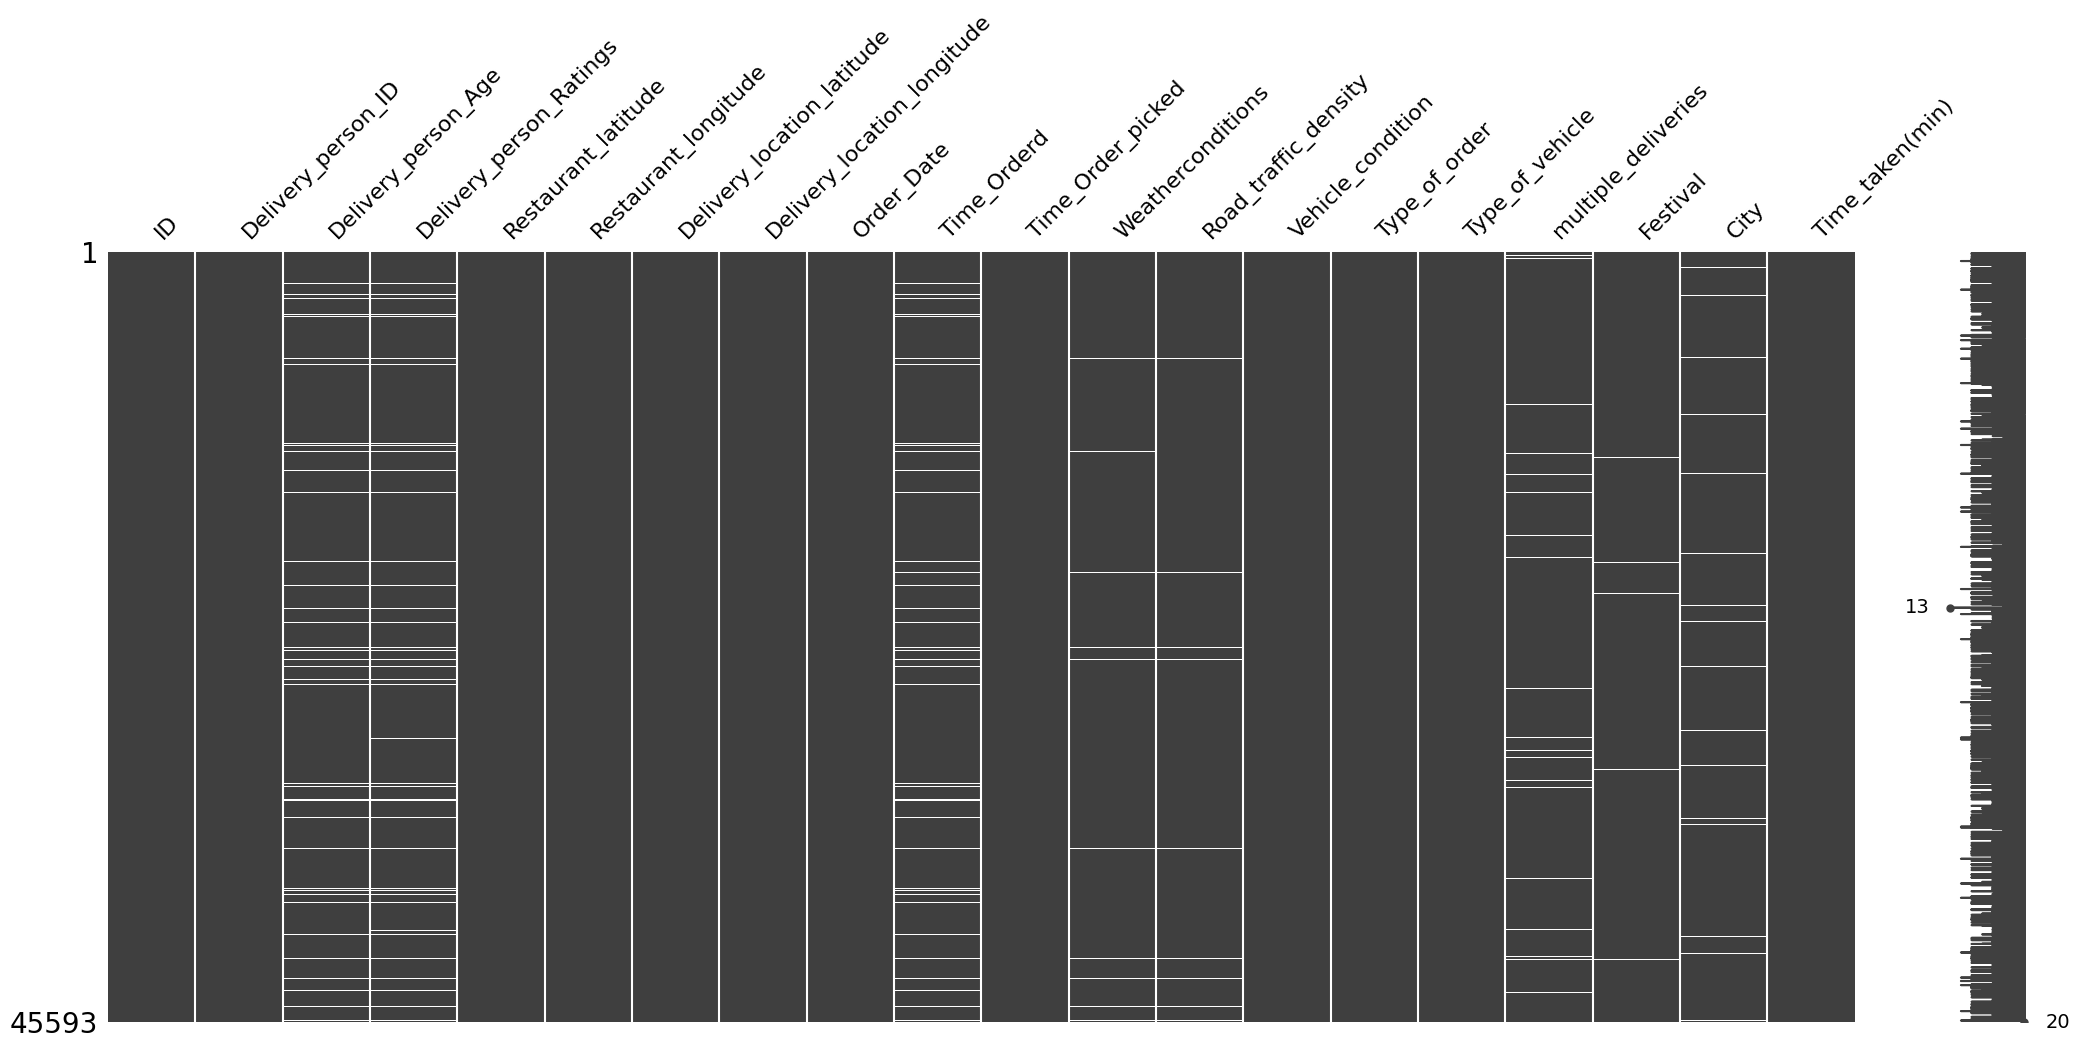

In [126]:
msno.matrix(df=df)

- looks like some correlation between values in Delivery_person_ID, Delivery_person_Age,Time_Ordered
- Corr between Weatherconditions, Road_traffic_density

<Axes: >

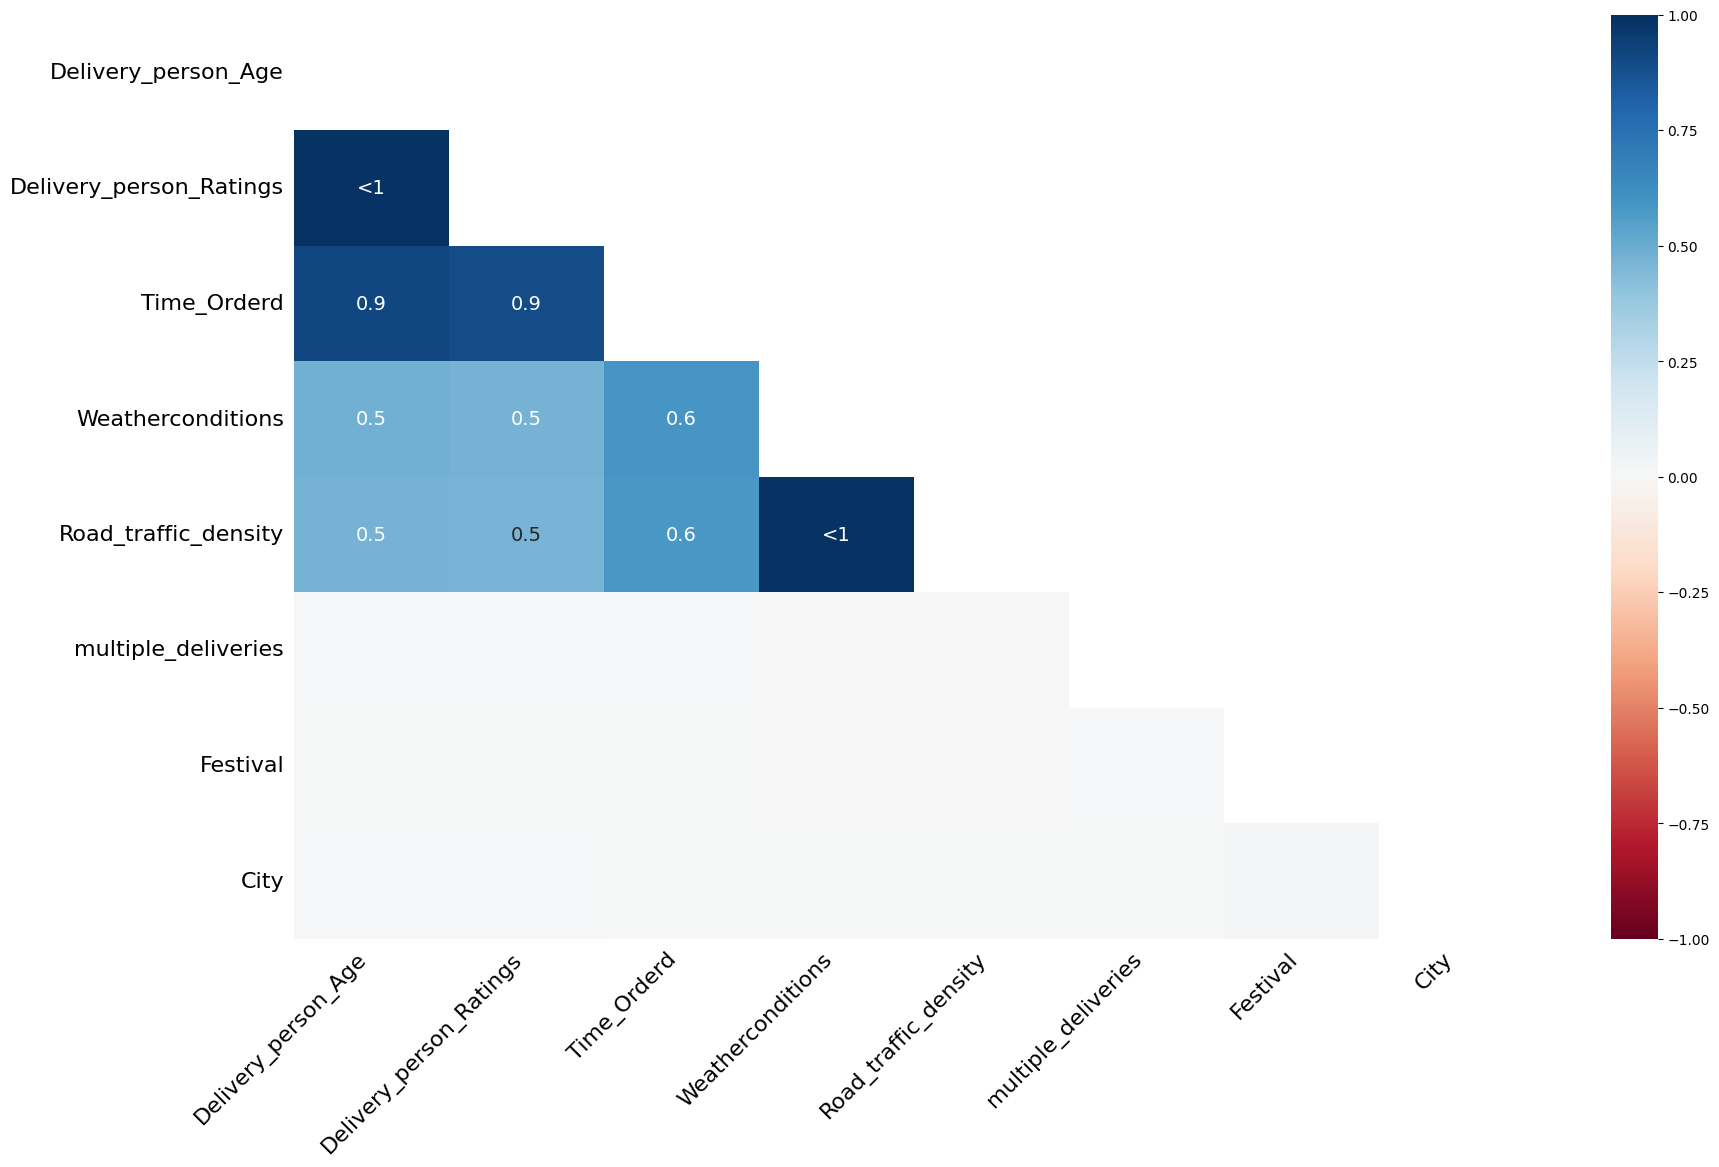

In [127]:
#corr between missing values
msno.heatmap(df)

- <1 indicate that there are a few records which have one or the other, but not both. 
- Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive

**Observations**

1. The delivery person columns are correlated to each other. This means that missingness in these columns is highly related which means lack of rider data.
2. The **time ordered** column is also related to the **rider** which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order.
3. There is a very high correlation between **WeatherConditions** patterns and the **road traffic** information. Be clear that this does not mean that the road traffic and weather columns are correlated. High corr in missingness means that if value in one column is missing, it is a high chance that it will be missing in others as well.
3. **Road traffic density** also shows correlation to the **rider** as it might be provided through the phone of rider (need to investigate).


<Axes: >

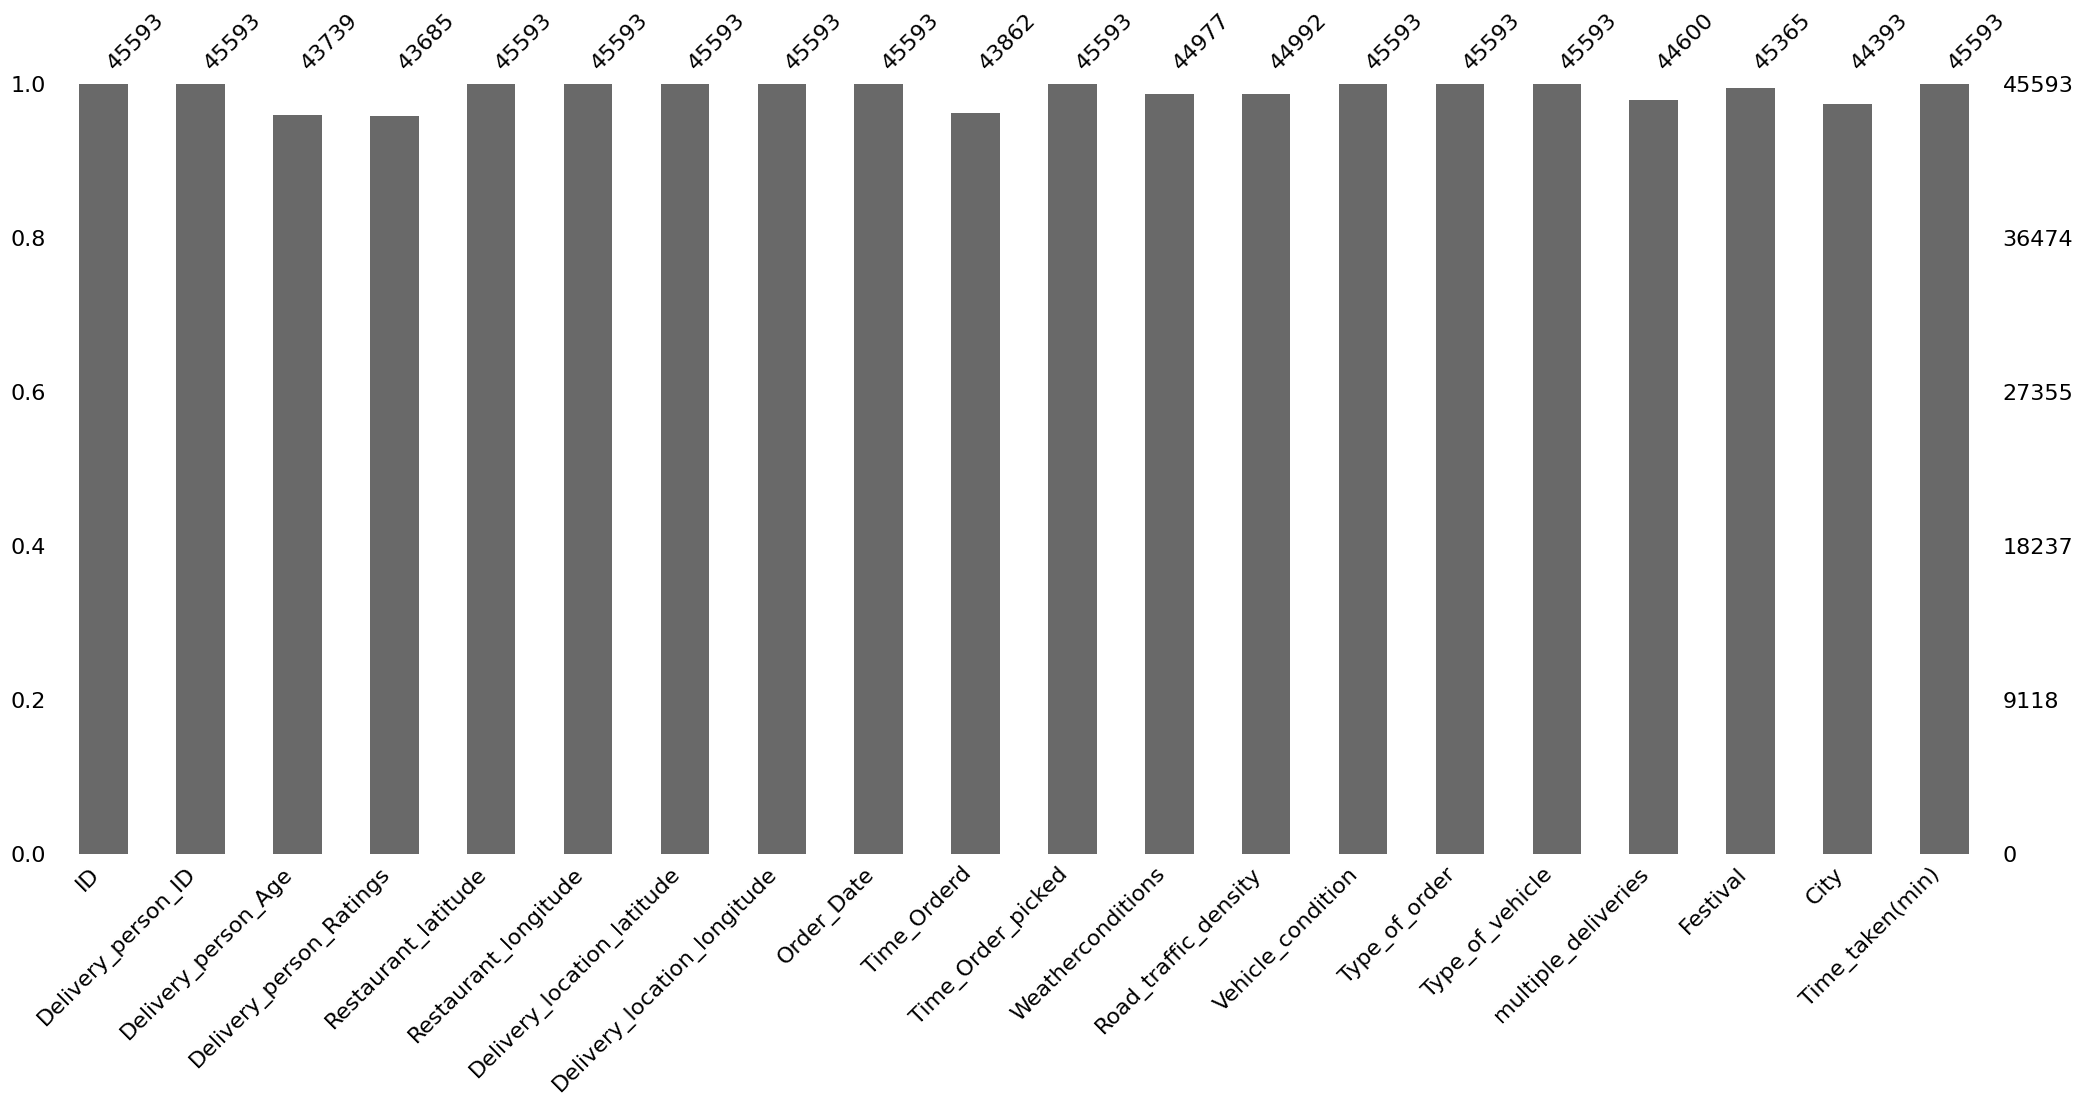

In [128]:
# count of missing values
msno.bar(df)

In [129]:
#cleaning
#renaming columns
df.columns.to_list()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [130]:
df.rename(columns={
            "Delivery_person_ID" : "rider_id",
            "Delivery_person_Age": "age",
            "Delivery_person_Ratings": "ratings",
            "Delivery_location_latitude": "delivery_latitude",
            "Delivery_location_longitude": "delivery_longitude",
            "Order_Date":"order_date",
            "Time_Orderd": "order_time",
            "Time_Order_picked": "order_picked_time",
            "Weatherconditions": "weather",
            "Road_traffic_density": "traffic",
            "City": "city_type",
            "Time_taken(min)": "time_taken"},inplace=True)

In [131]:
df.columns = df.columns.str.lower()

In [132]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [133]:
#check for duplicate data
df.duplicated().sum()

0

## Column wise cleaning

In [134]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

- ID

In [135]:

df['id'].unique()

array(['0x4607 ', '0xb379 ', '0x5d6d ', ..., '0x4f8d ', '0x5eee ',
       '0x5fb2 '], dtype=object)

In [136]:
df['id'].nunique()

45593

In [137]:
#cleaning
#since it does not contain any useful info -> drop

df.drop(columns=['id'],inplace=True)

In [138]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45593 non-null  object 
 1   age                   43739 non-null  object 
 2   ratings               43685 non-null  object 
 3   restaurant_latitude   45593 non-null  float64
 4   restaurant_longitude  45593 non-null  float64
 5   delivery_latitude     45593 non-null  float64
 6   delivery_longitude    45593 non-null  float64
 7   order_date            45593 non-null  object 
 8   order_time            43862 non-null  object 
 9   order_picked_time     45593 non-null  object 
 10  weather               44977 non-null  object 
 11  traffic               44992 non-null  object 
 12  vehicle_condition     45593 non-null  int64  
 13  type_of_order         45593 non-null  object 
 14  type_of_vehicle       45593 non-null  object 
 15  multiple_deliveries

### rider_id

In [139]:
df['rider_id'].nunique()

1320

In [140]:
df['rider_id'].value_counts()

rider_id
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64

In [141]:
#cleaning
#extracting city name from rider_id
df['city_name'] = df['rider_id'].str.split('RES').str[0]

In [142]:
df['city_name'].unique()

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AURG', 'AGR', 'VAD', 'ALH', 'BHP'], dtype=object)

In [143]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45593 non-null  object 
 1   age                   43739 non-null  object 
 2   ratings               43685 non-null  object 
 3   restaurant_latitude   45593 non-null  float64
 4   restaurant_longitude  45593 non-null  float64
 5   delivery_latitude     45593 non-null  float64
 6   delivery_longitude    45593 non-null  float64
 7   order_date            45593 non-null  object 
 8   order_time            43862 non-null  object 
 9   order_picked_time     45593 non-null  object 
 10  weather               44977 non-null  object 
 11  traffic               44992 non-null  object 
 12  vehicle_condition     45593 non-null  int64  
 13  type_of_order         45593 non-null  object 
 14  type_of_vehicle       45593 non-null  object 
 15  multiple_deliveries

### Age

In [144]:
df['age'].isna().sum()	#it has missing data

1854

In [145]:
df['age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

- Min rider age of 15 is concerning as it is below the permisible driving age

In [146]:
df[df['age'].astype(float)<18]

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name
2387,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15,JAP
2905,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29,INDO
2951,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20,SUR
5902,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25,CHEN
9156,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34,BANG
10900,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39,MUM
11125,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27,SUR
12093,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28,INDO
15124,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21,RANCHI
15927,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17,CHEN


### Observations
- All ratings is 1
- Weather col entirely Nan
- Traffic col entirely NaN
- order_time col entirely Nan
- All rows have age= 15 -> seems like data error

**Seems like there is data error . Since there are many missing values, hence missing value imputation is difficult**

In [147]:
df[df['age'].astype(float)<18].shape

(38, 20)

In [148]:
#cleaning
#since only 38 rows -> data can be dropped
df.drop(index = df[df['age'].astype(float)<18].index,inplace=True)

In [149]:
#cleaning 
#change dtype to float
df['age'] = df['age'].astype(float)

In [150]:
df.shape
# change from 45592 -> 45555 

(45555, 20)

<Axes: ylabel='age'>

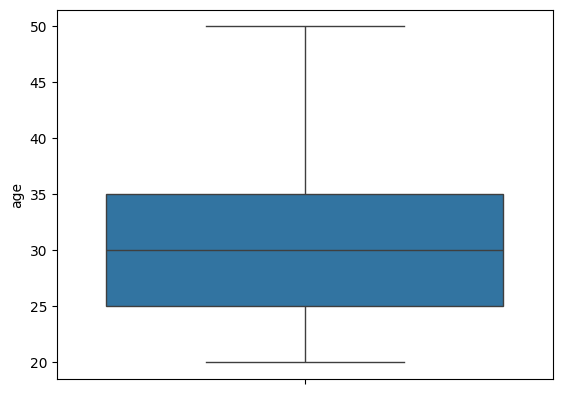

In [151]:
sns.boxplot(df['age'])

In [152]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45555 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45555 non-null  object 
 1   age                   43701 non-null  float64
 2   ratings               43647 non-null  object 
 3   restaurant_latitude   45555 non-null  float64
 4   restaurant_longitude  45555 non-null  float64
 5   delivery_latitude     45555 non-null  float64
 6   delivery_longitude    45555 non-null  float64
 7   order_date            45555 non-null  object 
 8   order_time            43862 non-null  object 
 9   order_picked_time     45555 non-null  object 
 10  weather               44977 non-null  object 
 11  traffic               44992 non-null  object 
 12  vehicle_condition     45555 non-null  int64  
 13  type_of_order         45555 non-null  object 
 14  type_of_vehicle       45555 non-null  object 
 15  multiple_deliveries   44

### Ratings

In [153]:
df['ratings'].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', nan, '3.8', '3.9', '3.7', '2.6', '2.5', '3.6', '3.1',
       '2.7', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'], dtype=object)

In [154]:
df['ratings'].astype(float).describe()

count    43647.000000
mean         4.636944
std          0.317217
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

- Six Star rating possibly error -> scale from 1 to 5

In [155]:
df[df['ratings'].astype(float)>5]

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name
3586,BANGRES05DEL01,50.0,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25,BANG
4714,HYDRES17DEL01,50.0,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27,HYD
5169,JAPRES08DEL01,50.0,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20,JAP
5362,BANGRES19DEL01,50.0,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18,BANG
5651,AGRRES13DEL02,50.0,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20,AGR
6394,JAPRES06DEL02,50.0,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20,JAP
7031,MYSRES15DEL02,50.0,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14,MYS
7681,VADRES09DEL01,50.0,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22,VAD
9499,BANGRES010DEL01,50.0,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17,BANG
9535,RANCHIRES13DEL01,50.0,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32,RANCHI


- All riders have age 50
- All rows have ratings = 6 
- Ordertime,Weather,Traffic column are full NaN -> seems like same kind of error as for age<18

<Axes: ylabel='ratings'>

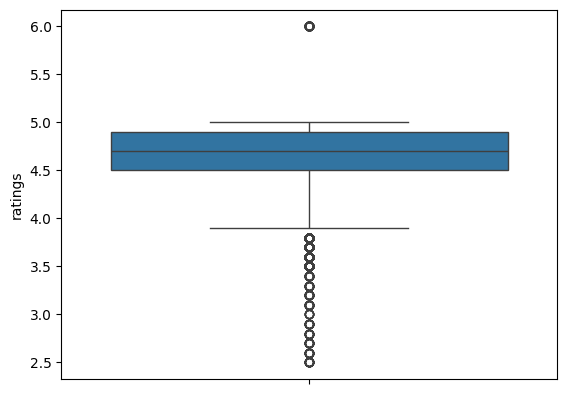

In [156]:
sns.boxplot(df['ratings'].astype(float))

In [157]:
df[df['ratings'].astype(float)>5].shape

(53, 20)

In [158]:
#cleaning
#removing data
df.drop(index=df[df['ratings'].astype(float)>5].index,inplace=True)
# change from 45592 -> 45555 --> 45502

In [159]:
df['ratings'] = df['ratings'].astype(float)

<Axes: ylabel='ratings'>

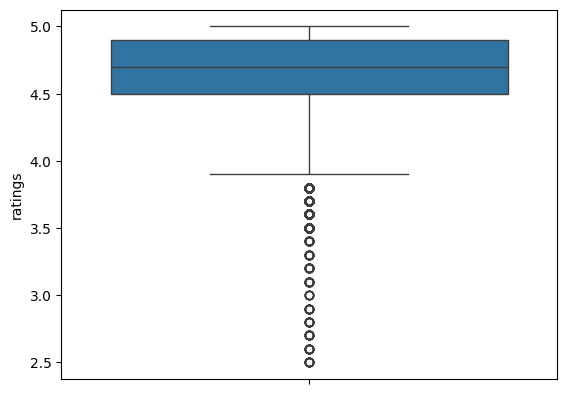

In [160]:
sns.boxplot(df['ratings'])

In [161]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   45502 non-null  float64
 4   restaurant_longitude  45502 non-null  float64
 5   delivery_latitude     45502 non-null  float64
 6   delivery_longitude    45502 non-null  float64
 7   order_date            45502 non-null  object 
 8   order_time            43862 non-null  object 
 9   order_picked_time     45502 non-null  object 
 10  weather               44977 non-null  object 
 11  traffic               44992 non-null  object 
 12  vehicle_condition     45502 non-null  int64  
 13  type_of_order         45502 non-null  object 
 14  type_of_vehicle       45502 non-null  object 
 15  multiple_deliveries   44

### location columns (restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude)

In [162]:
location_columns = df.columns[3:7].tolist()
location_columns

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [163]:
location_subset = df.loc[:,location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


**Valid values for lat and long**

 > India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.

In [164]:
# statistical analysis

location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45502.000000,45502.000000,45502.000000,45502.000000
mean,17.046293,70.326557,17.468434,70.848718
std,8.131457,22.591753,7.334058,21.111306
min,-30.905562,-88.352885,0.010000,0.010000
25%,12.933284,73.170283,12.988453,73.280000
50%,18.551440,75.898497,18.634382,76.002471
75%,22.728163,78.045043,22.785049,78.105359
max,30.914057,88.433452,31.054057,88.563452


In [165]:
# set the lower bound limits for the lat and long

lower_bound_lat = 6.44
lower_bound_long = 68.70

# rows of data where latitude and longitude values are below the bounds

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].sample(5)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name
38977,DEHRES12DEL03,31.0,4.9,0.0,0.0,0.09,0.09,12-02-2022,00:00:00,00:15:00,conditions Sunny,Low,2,Snack,scooter,0,No,Metropolitian,(min) 27,DEH
41810,VADRES02DEL03,31.0,4.1,0.0,0.0,0.06,0.06,05-04-2022,17:35:00,17:45:00,conditions Fog,Medium,0,Buffet,motorcycle,NaN,No,Metropolitian,(min) 31,VAD
22357,VADRES09DEL03,20.0,4.2,0.0,0.0,0.06,0.06,09-03-2022,22:35:00,22:50:00,conditions Sandstorms,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 27,VAD
28679,VADRES08DEL01,28.0,4.8,0.0,0.0,0.01,0.01,05-04-2022,10:20:00,10:25:00,conditions Cloudy,Low,0,Meal,motorcycle,1,No,Metropolitian,(min) 18,VAD
35451,VADRES08DEL01,37.0,4.7,0.0,0.0,0.07,0.07,20-03-2022,17:55:00,18:10:00,conditions Stormy,Medium,0,Snack,motorcycle,0,No,Metropolitian,(min) 40,VAD


In [166]:
# number of rows in data where lat long are erroneous

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].shape[0]

4029

In [167]:
# statistical summary of problematic rows where lat long is below the country's geographical limits

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4029.000000,4029.000000,4029.000000,4029.000000
mean,-2.024551,2.522899,2.087684,7.764720
std,6.385871,24.383056,6.386195,23.271934
min,-30.905562,-88.352885,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

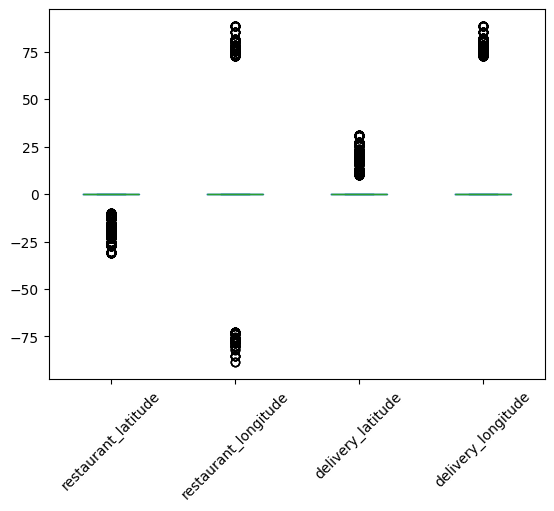

In [168]:
# boxplots for all the anomalies

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

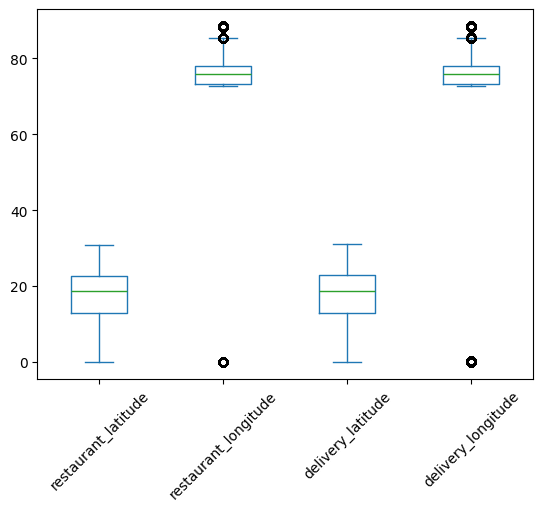

In [169]:
# taking the absolute values

(
    location_subset.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [170]:
# number of rows after taking absolute values

(
    location_subset.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)]
    .shape[0]

)

3630

In [171]:
location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [172]:
df['restaurant_latitude'] = df['restaurant_latitude'].abs()
df['restaurant_longitude'] = df['restaurant_longitude'].abs()
df['delivery_latitude'] = df['delivery_latitude'].abs()
df['delivery_longitude'] = df['delivery_longitude'].abs()

In [173]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location_subset.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.NaN, data[col].values)
            )
            for col in location_columns
        })
    )
df = clean_lat_long(df)

In [174]:
df.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
order_time              1640
order_picked_time          0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
dtype: int64

In [175]:
df[(df['restaurant_latitude'].isna()) & (~df['delivery_longitude'].isna())].describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### order_date

In [176]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken',
       'city_name'],
      dtype='object')

In [177]:
df['order_date'].isna().sum()

0

In [178]:
df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [179]:
#cleaning
#since format is correct -> change to pd.Datetime
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

In [180]:
#checking daterange
df['order_date'].max() - df['order_date'].min()

Timedelta('54 days 00:00:00')

In [181]:
df['order_date'].max(),df['order_date'].min()

(Timestamp('2022-04-06 00:00:00'), Timestamp('2022-02-11 00:00:00'))

In [182]:
#cleaning
#extract date,month,day_of_week,year,weekend

def extract_datetime(date):
    return pd.Series([date.day,
                      date.month,
																						date.day_name(),
																						1 if date.day_name() in ["Saturday","Sunday"] else 0])

print(type(df['order_date'][0]))	#pandas._libs.tslibs.timestamps.Timestamp

df[['order_day','order_month','order_day_of_week','is_weekend']]= df['order_date'].apply(extract_datetime)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [183]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO,19,3,Saturday,1
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG,25,3,Friday,0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG,19,3,Saturday,1
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB,5,4,Tuesday,0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN,26,3,Saturday,1


In [184]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken',
       'city_name', 'order_day', 'order_month', 'order_day_of_week',
       'is_weekend'],
      dtype='object')

In [185]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  object        
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### order_time

In [186]:
df['order_time'] = pd.to_datetime(df['order_time'],format='mixed')

In [ ]:
# def time_of_day(ser: pd.Series):

#     return(
#         pd.cut(ser,bins=[0,6,12,17,20,24],right=True,
#                labels=["after_midnight","morning","afternoon","evening","night"])
#     )


def extract_ordertime_details (row):
    # if pd.isna(row['order_time']):
    #     return pd.Series([np.NaN,np.NaN,np.NaN])
    
    order_time_hr = row['order_time'].hour
    pickup_time_min = (pd.to_datetime(row['order_picked_time']) - row['order_time']).seconds/60
    order_time_of_day = "after_midnight"	#default
    
    if pd.isna(order_time_hr):
        order_time_of_day = np.nan
    if 6<order_time_hr<=12:
        order_time_of_day = "morning"
    if 12<order_time_hr<=17:
        order_time_of_day = "afternoon" 
    if 17<order_time_hr<=20:
        order_time_of_day = "evening" 
    if 20<order_time_hr<=24:
        order_time_of_day = "night"
    return pd.Series([pickup_time_min,order_time_hr,order_time_of_day])
    
df[['pickup_time_minutes','order_time_hour','order_time_of_day']]= df.apply(extract_ordertime_details,axis=1)

In [188]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-05-28 11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO,19,3,Saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-05-28 19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG,25,3,Friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-05-28 08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG,19,3,Saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-05-28 18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB,5,4,Tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-05-28 13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN,26,3,Saturday,1,15.0,13.0,afternoon


In [189]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### Weather

In [190]:
df['weather'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy', nan],
      dtype=object)

In [191]:
df['weather'] = df['weather'].str.replace("conditions ","")

In [192]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### traffic

In [193]:
df['traffic'] = df['traffic'].str.strip().str.lower()

In [194]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### Vehicle Condition

In [195]:
df['vehicle_condition'].unique()

array([2, 0, 1, 3])

### type_of_order

In [196]:
df['type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [197]:
df['type_of_order'] = df['type_of_order'].str.strip().str.lower()

In [198]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### type of vehicle

In [199]:
df['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [200]:
df['type_of_vehicle'] = df['type_of_vehicle'].str.rstrip().str.lower()

In [201]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### Multiple Deliveries

In [202]:
df['multiple_deliveries'].unique()

array(['0', '1', '3', nan, '2'], dtype=object)

In [203]:
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)

In [204]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### Festival

In [205]:
df['festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [206]:
df['festival'] = df['festival'].str.rstrip().str.lower()

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### city_type

In [208]:
df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [209]:
df['city_type'] = df['city_type'].str.strip().str.lower()

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

### Time taken

In [211]:
df['time_taken'].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [212]:
df['time_taken'] = df['time_taken'].str.replace('(min) ','').astype(int)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   order_time            43862 non-null  datetime64[ns]
 9   order_picked_time     45502 non-null  object        
 10  weather               44977 non-null  object        
 11  traffic               44992 non-null  object        
 12  vehicle_condition     45502 non-null  int64         
 13  type_of_order        

In [214]:
df.drop(columns=['order_time','order_picked_time'],inplace=True)

In [215]:
#calculating distance
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

df = calculate_haversine_distance(df)


In [216]:
def distance_type(df):
    return pd.cut(df['distance'],bins = [0,5,10,15,25],right=False, labels=["short","medium","long","very_long"])
df['distance_type'] = distance_type(df)

In [ ]:
#exporting cleaned data
df.to_csv("../data/interim/02_cleaned_data.csv",index=False)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45502 non-null  object        
 1   age                   43648 non-null  float64       
 2   ratings               43594 non-null  float64       
 3   restaurant_latitude   41872 non-null  float64       
 4   restaurant_longitude  41872 non-null  float64       
 5   delivery_latitude     41872 non-null  float64       
 6   delivery_longitude    41872 non-null  float64       
 7   order_date            45502 non-null  datetime64[ns]
 8   weather               44977 non-null  object        
 9   traffic               44992 non-null  object        
 10  vehicle_condition     45502 non-null  int64         
 11  type_of_order         45502 non-null  object        
 12  type_of_vehicle       45502 non-null  object        
 13  multiple_deliveries  